The goal here is to be able to discern which neighborhood in Pittsburgh is the BEST. As we are data scientists we will take a data-driven approach to this question, utilizing open data available to the public about the city of pittsburgh in order to reach a conclusion. I hope to reach the conclusion that where I live is best, so that I might brag about it to my friends and family, but sadly this is not likely to be the case.

To me, a desireable neighborhood would be one that is balanced. There must be a balance in the people, and the sorts of things that you would do in such a neighborhood. It needs to be a place that you enjoy living, such that you would be happy to inhabit this area as opposed to others. It should also be progressive, providing a resident the satisfaction in knowing that they are in a locale that is socially and technologically up to date.

In this project I went about analyzing data in order to answer the question "which is the best neighborhood in Pittsburgh?" To do this I searched through data sets and was able to find some that suited my criterion of what would make a desireable neighborhood, being balance, beauty, and progressiveness. I was able to find datasets that include (but are not limited to) age demographics of Neighborhoods, the location of art pieces around the city, and the location of smart trash containers around the city. I was able to use these data tables to further my understanding of the city in a quantitative way and the use of these sets helped me to determine what I belive to be the best neighborhood in Pittsburgh.

to begin with, here is an analyzation of one of the datasets, which is a simple analyzation that tallied all of the smart trash containers in a given neighborhood by iterating over the set and ticking a counter for each individual neighborhood.

Text(0.5, 1.0, 'Smart Trash in Neighborhoods')

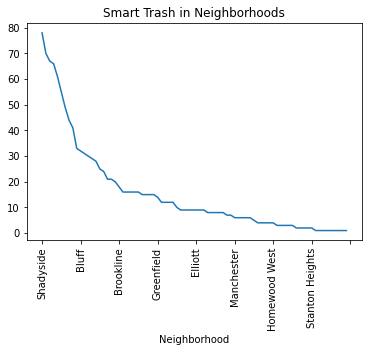

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

u = pd.read_csv("75b83ac9-8069-4cf1-bcc3-b9e6b04487d9.csv")

p = {}

for x in range(len(u["neighborhood"])):
    if  p.get(u["neighborhood"][x]) is not None:
        p[u["neighborhood"][x]] += 1
    else:
         p[u["neighborhood"][x]] = 1
            
            

p = sorted(p.items(), key=lambda x: x[1], reverse = True)
  
#for tup in p:
 #   try:
  #      print(tup[0], ":", " " * (27 - len(tup[0])), tup[1],sep="")
   # except:
    #    print("NOT SURE WHATS UP WITH THIS DATA POINT")
    
nbhd,ct = zip(*p)


plot = pd.Series(ct,index = nbhd)

plot.plot(rot=90)
plt.xlabel('Neighborhood')
plt.title("Smart Trash in Neighborhoods")

This is just a simple analyzation of data, but I belive that counting these smart recepticles is a good way to track the progressiveness of communities as it shows the dedication towards the maintaining of a desireable public area that community members reside in. This is not an accurate way to find out what the best neighborhood overall is for the city, so I will need to analyze some more data in order to be able to come to a conclusion. (if you would like to see the counts in more detail, uncomment the for loop in the above code snippet)

Moving on to another relatively simple data analyzation, we are again going to be looking at the quantity of objects in the neighborhoods. However, This time there is a small twist. This dataset that I am drawing from contains information on the location of all public art pieces in Pittsburgh, including statues, war memorials, modern art, etc. However I think that a more progressive and beautiful area to live in would have a lot of wall art; I am not much one for statues as they often are quite dull. Thus, when sifting through this data, I would only add a tally to the neighborhood art count if the art_type of the specific fixture had the word "Art" in it (which I determined would be a good filter by looking over the unique art_type attributes). This way the neighborhood with the most modern and contemporary wall art would get a high count of works.

1.18.5


Text(0.5, 1.0, 'Non-Statue Art in Neighborhoods')

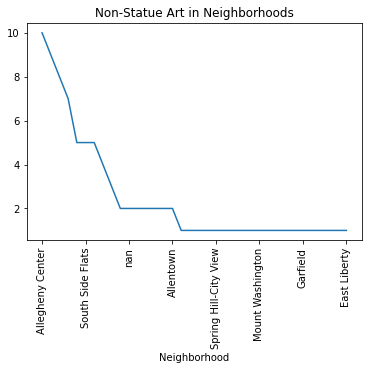

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(19680801)

a = pd.read_csv("00d74e83-8a23-486e-841b-286e1332a151.csv")

p = {}

for x in range(len(a["neighborhood"])):
    if  "Art" in str(a["art_type"][x]):
        if  p.get(a["neighborhood"][x]) is not None:
            p[a["neighborhood"][x]] += 1
        else:
             p[a["neighborhood"][x]] = 1
            
            
#lol
p = sorted(p.items(), key=lambda x: x[1], reverse = True)


#for tup in p:
 #   try:
  #      print(tup[0], ":", " " * (27 - len(tup[0])), tup[1],sep="")
   # except:
    #    print("NOT SURE WHATS UP WITH THIS DATA POINT")
    

nbhd,ct = zip(*p)
print(np.version.version)

plot = pd.Series(ct,index = nbhd)

plot.plot(rot=90)
plt.xlabel('Neighborhood')
plt.title("Non-Statue Art in Neighborhoods")

Now we can see which areas have the most art (or none at all). This is how I decided to define (somewhat) what "beauty" is in a neighborhood. I also looked at a count of all the trees in neighborhoods, but I realized that such a metric was already given as an example for the project, so i scrapped that idea and found this more interesting set to replace it. (Once again you can remove the comments in the for loop to see a more descriptive tally of artworks in each hood)

Finally, I wanted to try to work with a more complicated dataset for my last metric. I found the Neighborhoods_with_SNAP_data csv, and scoured through the many columns to find interesting data points. I found the age bracket percentages, and thought that this would be a good way to evaluate the balance of the neighborhood. If there is a good distribution of ages of individuals throughout the neighborhood, there must certainly be different factors that are drawing all of them in if they chose to live here, as people of different ages will certainly have differing priorities when it comes to homeownership. I took the average of each bracket of ages (of which there were 6, and making sure to omit outlier values like zero which ended up being somewhat common) and then compared each individual value for the neighborhoods to that average. Initially I wanted to compare it to the US national average, but I thought it a better idea to stay in the local sphere. After evaluating the difference between the average and each value,  Icalculated the standard deviation of the each bracket of data and found how many deviations away each neighborhood was away from the average of the given bracket. I then sorted the data so that it would be easier to understand and process.

In [5]:
import numpy as np
import pandas as pd
#
#
#
#
#
hoodNO_hood = ["Neighborhood_2010_HOOD_NO","Neighborhood_2010_HOOD"]
ageRangeList = ["F__Pop__Age___5__2010_", "F__Pop__Age_5_19__2010_","F__Pop__Age_20_34__2010_", "F__Pop__Age_35_59__2010_", "F__Pop__Age_60_74__2010_", "F__Pop__Age___75__2010_"]
US_age_distribution = [6.1, 19.0, 20.6, 31.7, 16.1, 6.6]
#                   0-5, 5-19, 20-34, 35-59, 60-74, 75-deth
#unused set as I now am comparing to the means of the dataset

def string_to_float(x):
    x = x[:len(x) - 1]
    #chop percent sign
    x = float(x)
    #convert to float value
    return x
    #add to list, then find the mean and standard deviation of the dataset and make a graph


g = pd.read_csv("Neighborhoods_with_SNAP_Data.csv")


#init average, standard deviation, and difference array.  
#difference: difference between the datas points value and the mean
#dev-away: standard deviations away from mean
template_dict = {'name':"", 'percentage':0.0, 'difference': 0.0, 'dev_away':0.0}

percentage_array = [[0.0 for a in range(90)] for b in range(6)]
average_array = [0] * 6
SD_array = [0] * 6
diff_array = [[dict(template_dict) for a in range(90)] for b in range(6)]
sorted_array_list = [0] * 6




#converts all age percentages to float values in a 2d array
for x in range(len(ageRangeList)):
    counter = 0
    for t in g[ageRangeList[x]]:
        t = string_to_float(t)
        percentage_array[x][counter] = t
        counter += 1

#finding the average, which goes in average_array[counter]
counter = 0

for x in percentage_array:
    sum = 0.0
    count = 0
    for y in x:
        if (y != 0):
            sum += y
            count += 1
    average_array[counter] = sum/count
    
    #finding SD
    sum = 0
    for y in x:
        sum += pow((y - average_array[counter]), 2)
    SD_array[counter] = pow((sum/count), 0.5)
    counter += 1
   
#idk why this is red

#fill array with difference between percentage and mean, and sd away from mean
for x in range(6):
    for y in range(len(diff_array[x])):
        try:
            diff_array[x][y]['name'] = g['Neighborhood_2010_HOOD'][y]
            diff_array[x][y]['percentage'] = percentage_array[x][y]
            diff_array[x][y]["difference"] = diff_array[x][y]['percentage'] - average_array[x]
            diff_array[x][y]['dev_away'] = diff_array[x][y]['difference']/SD_array[x]
        except:
            continue
   

for x in range(6):
    sorted_array = sorted(diff_array[x], key = lambda k: abs(k['dev_away']))
    sorted_array_list[x] = list(sorted_array)
    
for dd in sorted_array:
    print(dd)

    
#for dicto in sorted_array:
 #   print(dicto['name'], ":", " " * (27 - len(dicto['name'])), "%0.3f" % (dicto['difference']),sep="")
    
#print (sorted_array_list)
#sorted_array_list is the final product. it contains an array of dictionaries containing the names
#of neighborhoods, the percentage of the age group that list represents, and standard deviations away
#from the mean of that age group is

#g = pd.pivot_table(g, index = hoodNO_hood, values = ageRangeList,aggfunc='first')
#g.head()


{'name': 'Overbrook', 'percentage': 9.04, 'difference': -0.13623529411764324, 'dev_away': -0.02669427608669654}
{'name': 'Carrick', 'percentage': 9.35, 'difference': 0.17376470588235726, 'dev_away': 0.03404788063907848}
{'name': 'Lincoln Place', 'percentage': 9.38, 'difference': 0.2037647058823584, 'dev_away': 0.03992615387060531}
{'name': 'Hazelwood', 'percentage': 9.45, 'difference': 0.2737647058823569, 'dev_away': 0.053642124744167095}
{'name': 'West End', 'percentage': 9.48, 'difference': 0.30376470588235804, 'dev_away': 0.059520397975693924}
{'name': 'South Side Slopes', 'percentage': 8.83, 'difference': -0.3462352941176423, 'dev_away': -0.0678421887073826}
{'name': 'Bedford Dwellings', 'percentage': 8.81, 'difference': -0.3662352941176419, 'dev_away': -0.07176103752840025}
{'name': 'Crafton Heights', 'percentage': 9.71, 'difference': 0.5337647058823585, 'dev_away': 0.10458715941739798}
{'name': 'Morningside', 'percentage': 8.58, 'difference': -0.5962352941176423, 'dev_away': -0.1

Sorry for the code being so messy, but with this dataset there was a lot of trial and error. I also found it very difficult to figure out how to plot this visually, so I decided it best to leave that for another day. However you can see now how I have organized this data. the 'dev_away' value in each of these dicts is the standard deviations away from the age brackets average (In this case the age bracket is 0-5, and the average is around 9.05%). I believe that this is a good way to understand the balance of a neighborhood as a variety of ages in a community can mean a lot of good things.

So what is the conclusion? has a best neighborhood been found? Well, yes and no. It is difficult to say for certain what the best neighborhood is as that really comes down to personal preference, but I believe that using these metrics I have found a neighborhood that most would find themselves welcomed in and enjoyable as a whole. The neighborhood that I deemed best is... a tie! between Squirrel Hill South and Squirrel Hill North. the reason for this is that, although Squirrel Hill South often edged out the North in pretty meaningful ways, I did some further research into these areas and found that although the city separates them for practical reasons, most locals understand these two neighborhoods as just being one; so perhaps it is more fitting to say that Squirrel Hill is the best neighborhood in Pittsburgh. Lets evaluate the reasons for this conclusion.
First off, SHS placed third overall in quantity of smart trash contqaineres, with a whopping 67, not far from first place. SQN had but 21, placing it still quite squarely in the top 1/3 of all hoods. In terms of art pieces, SHS again had a large amount of art pieces spread throughout it, totaling 7 (the highest being 10), placing it in second. Funnily enough SHN did not show up on this chart, but it does have some other pieces of art so it cannot be all bad.
Now here is where we get to age demographic chart. this one took a while to analyze as the data was all over the place. I looked at the positions across many brackets that the top contenders in the other sets were in (such as Allegheny Center, East Liberty, Shadyside, etc.) and found that none had as good a cluster as SHS and SHN. oftentimes they would have a percentage that came very close to the average, but would then have a completely skewed data point in the next bracket! However, for the Squirrel Hills, they would always be at least in the middle 50% of data points, and would often find themselves in the upper echelon, the top 15-25% of neighborhoods. So, based on a conglomerate of data points, I finally pieced together the conclusion that Squirrel Hill (South if you must choose) is the best neighborhood in Pittsburgh, as it strikes a healthy balance in ages of residents, is very beautiful containg lots of art (and trees), and is very progressive with a desire to keep its community areas clean.